In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

### Iris Dataset
Load and partition the dataset into test and train subset with a ration of 0.3

In [20]:
df = pd.read_csv('~/Documents/Week_06_HW6_Iris_Dataset.csv')

# keep the relevant columns
df = df[['sepalWidth',  'petalWidth', 'irisSpecies']]

# translate qualitative label to a binary quantitative label
df['Y'] = 1
df.loc[df['irisSpecies'] == 'Iris-setosa', 'Y'] = 0
df = df.drop(columns=['irisSpecies'])

# make sure looks clean
print(df.head())
print(df.describe())
print(df.shape)

# split into test and train 
x_train, x_test, y_train, y_test = train_test_split(
    df[['sepalWidth',  'petalWidth']], df['Y'], test_size=0.3, random_state=1
)

   sepalWidth  petalWidth  Y
0         3.5         0.2  0
1         3.0         0.2  0
2         3.6         0.2  0
3         3.9         0.4  0
4         3.4         0.3  0
       sepalWidth  petalWidth           Y
count  100.000000  100.000000  100.000000
mean     3.094000    0.785000    0.500000
std      0.476057    0.566288    0.502519
min      2.000000    0.100000    0.000000
25%      2.800000    0.200000    0.000000
50%      3.050000    0.800000    0.500000
75%      3.400000    1.300000    1.000000
max      4.400000    1.800000    1.000000
(100, 3)


### Linear Regression

This is a classification problom, and linear regression is not a 
suitable approach for classification problems. For example the response variable has to be transformed to numerical variable first. This imposes an ordering on the labels, which is not possible to determine in general. 
However, we have only two classes of flowers here, Iris-setosa and Iris-versicolor. It can be shown that the regression model does not depend on the ordering of numerical labels in a binary classification.
Another problem is that the model response is a continuous variable and we'll need to interpret the outcomes as probablities. However, it's possible that responses are negative, or bigger than 1. 

In [24]:
model = LinearRegression()
model.fit(x_train, y_train)
r2 = model.score(x_test, y_test)
print('R^2:', r2)
print('Coefficients and intercept:', model.coef_, model.intercept_)
# these should be interpreted as probabilities, 
# but notice it's possible to have negative values, or values greater than 1
print(model.predict(x_test)[:5])

R^2: 0.9552979540749827
Coefficients and intercept: [-0.19808095  0.74590766] 0.5224362573357109
[-0.01702393  0.03775874 -0.06128173  0.05292522  1.06686298]


### Logistic Regression

Logistic regression addresses the problems outlined under using linear regression for a classification problem.

In [27]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_test, y_test)
print(model.classes_)
print(model.score(x_test, y_test))
print(classification_report(y_test, model.predict(x_test)))

[0 1]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Kmeans
Here we use two clusters, and fit the model on the train dataset. Then predict the test data set and plot them. Cluster centers are shown with a cross sign.

cluster centers: [[2.74285714 1.30857143]
 [3.44857143 0.23714286]]


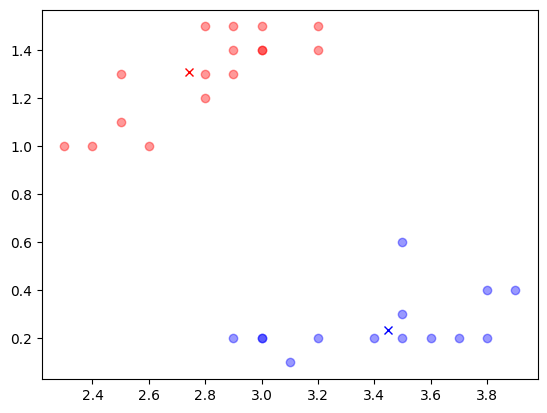

In [32]:
model = KMeans(n_clusters=2).fit(x_train)
print('cluster centers:', model.cluster_centers_)
pred = model.predict(x_test)

cluster_df = pd.DataFrame(pred, index=x_test.index, columns=['cluster']).join(x_test, how='inner')
s = cluster_df[cluster_df['cluster'] == 0]
v = cluster_df[cluster_df['cluster'] == 1]
plt.plot(s[['sepalWidth']], s[['petalWidth']], 'or', alpha=0.4)
plt.plot(v[['sepalWidth']], v[['petalWidth']], 'ob', alpha=0.4)
plt.plot(model.cluster_centers_[0][0], model.cluster_centers_[0][1], 'xr')
plt.plot(model.cluster_centers_[1][0], model.cluster_centers_[1][1], 'xb')

### ANN

Here we fit a two layer neural network with an input layer, a second dense layer, and an output layer. It turns out that even with only 2 neurons, this network reaches a 100% accuracy if 'lbfgs' optimizer is used. This converges a lot faster than other optimizers on small datasets.

In [58]:
model1 = MLPClassifier(
    hidden_layer_sizes=(2,), 
    activation='relu',
    random_state=1, 
    solver='lbfgs',
    max_iter=50
).fit(x_train, y_train)

print(classification_report(y_test, model1.predict(x_test)))

# needs a higher max_iter or larger number of hidden_layer_sizes to reach 100% accuracy
model2 = MLPClassifier(
    hidden_layer_sizes=(50,), 
    activation='relu',
    random_state=1, 
    solver='adam',
    max_iter=50
).fit(x_train, y_train)
print(classification_report(y_test, model2.predict(x_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
